$\newcommand{\rads}{~rad.s$^{-1}$}$
$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\glm}[1]{\overline{#1}^L}$
$\newcommand{\psmom}[0]{\boldsymbol{\textsf{p}}}$
$\newcommand{\di}[0]{\textrm{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\mde}[1]{\frac{\textrm{D} {#1}}{\textrm{D} t}}$
$\newcommand{\mdel}[1]{\textrm{D}_t {#1}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\mathrm i}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\Fma}[0]{\vec F=m\vec a}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings: Morin 3.1 to 3.3 and 3.5; start going through the computational physics website, do tutorials 1 and 2 (see Syllabus)*

# Expectations

## Remember

* Newton's three laws.
* What is an inertial reference frame.
* Newton's second law $\Fma$.
* $\vec a = \dot{\vec v} = \ddot{\vec r}$.
* What a conservative force is.
* Always try a variable separation first.
* $x = r\cos\theta$ and $y = r\sin\theta$, and what it means.

## Understand

* How to solve $\Fma$ problems using basic ODE techniques
* Why we need polar coordinates sometimes
* In polar coordinates, why the unit vectors change depending on position.

## Apply

* Use separation of variables.
* Know when to use polar coordinates.
* How to derive the velocity and acceleration expressions in polar coordinates.
* How to use $\Fma$ formulas in polar coordinates.
* ... and make sure you can do worked examples, tutorials and problem sets.

# Introduction

## Newton's laws

In PHY131 and PHY151/2 (*or equivalent, which I will omit from now on*), you saw how to use Newton's laws to solve basic mechanics problems. As a reminder, according to Morin (§3.1), Newton's three laws are

> * **First law:** A body moves with constant velocity (which may be zero) unless acted on by a (net) force.
> * **Second law:** The time rate of change of the momentum of a body equals the force acting on the body.
> * **Third law:** For every force on one body, there is an equal and opposite force on another body.

The **first law** allows us to introduce the concept of an inertial (or Galilean) frame of reference, i.e., a frame of references that moves with a constant velocity $\vec v_I$... *Relative to other inertial frames of reference.* Which may seem a bit circular, so let's consider a counter-example: a rotating frame of reference. Consider Alice sitting on a pony on a Mary-go-round, Bob chillin on a bench nearby, and Nico on a nearby frozen pond. You see, Nico can't skate, so he fell and is now drifting on the ice with the velocity he had when he fell. Bob and Nico are both subjected to zero net forces: for Bob, the reaction of the bench and maybe the ground perfectly balances any other forces the people are subjected to: weight, maybe strong bursts of wind. For Nico, let's neglect the friction due to the air and ice: again, reaction from the ground perfectly balances his weight, even his extra Covid-lbs (we assume that the ice is thick enough), and he will keep drifting at the same speed until he hits the edge. To Bob, Nico travels at constant velocity, and to Nico, Bob travels at an equal-and-opposite velocity. It is Alice who is the odd one out: to her, Bob and Nico appear to change their velocity all the time: they go left, away, right, closer... for no good reason, other than she is moving herself. To Bob and Nico, her velocity also changes all the time, being constant in the direction, tangential to her trajectory, but constantly changing her orientation. But the situations are not symmetric: Nico and Bob understand that her velocity keeps changing because she is *not* subjected to zero net forces: the reaction of the pony on her crotch keeps pulling her towards the centre of the Mary-go-round, and she feels a centrifugal acceleration that wants to ejects her outward (but doesn't).

In fact, you just need to ask them to know that their situations are not equal: Bob and Nico don't feel any acceleration and Nico could close his eyes and pretend that he is the one not moving. Alice on the other hand will soon want to trow up if she does not get out soon.

*Note: in this course, all our velocities will be much smaller than the speed of light. No relativity here!*

The **second law** is of course the darling of physics profs, because it is the law that allows us to solve simple and not-so-simple mechanical problems, and to design homework assignments and exams. I would feel silly, not to write it, so I will: if an object has a mass $m$ and velocity $\vec v$ in an inertial frame of reference, and is subjected to $N$ forces $\vec F_n$, $n=1\dots N$, then we have
\begin{equation}
    \ode{(m\vec v)}t = \sum_{n=1}^N\vec F_n.
    \label{eq:Newton2ndFull}
\end{equation}
If the mass stays constant (for example, Nico doesn't take off and throw his skates in a fit of rage), and defining $\vec F = \sum_{n=1}^N\vec F_n$, then we have the celebrated
$$\vec F = m\vec a,\with{} \vec a=\ode{\vec v}{t}.$$

Also, recall that $\vec v = \odel{\vec r}t$, with $\vec r$ the position of the centre of mass of the object in the same reference frame. Because I will use time derivatives often, I will often use the "dot" notation: one dot on top of an object is one time derivative, two dots denote a second derivative, and so on.
That is,
$$\vec a = \dot{\vec v} = \ddot{\vec r}.$$
Do not worry, we will never go beyond two times derivatives (but we will often go there).

Note that the **third law** is sort of embedded in the extended version of the 2nd law I wrote in eqn. \eqref{eq:Newton2ndFull}: you simply need to consider that $m\vec v$ represents the momentum of not one object or particle, but the momentum of, say, *two* objects: $m\vec v = m_1\vec v_1 + m_2\vec v_2$. And now assume that these two objects are exerting a force on each other, $\vec F_{1\to2}$ and $\vec F_{2\to1}$, and that no net force is acting on this system, that is, 
$$m \dot{\vec v} = m_1 \dot{\vec v}_1 + m_2 \dot{\vec v}_2 = 0.$$
And individually, each object follows
$$ m_1 \dot{\vec v}_1 = \vec F_{2\to1} \andeq m_2 \dot{\vec v}_2 = \vec F_{1\to2}.$$
Now, because adding the two equations above leads to zero on the LHS, the RHS reads $$\vec F_{1\to2}+ \vec F_{2\to1}=0,$$
and you have the 3rd law. 
This was a bit quick and Morin has a lengthier discussion, including about how this law is not *always* valid unless you extend the definition of what has a momentum to fields and other tricky concepts. Fortunately for us, we will not touch upon these situations in this course.

## Forces

There are four fundamental forces in the entire universe:

* Gravitational force
* Electromagnetic (EM) force
* Strong nuclear force
* Weak nuclear force

In this course, we will deal with forces that derive from the first two, the last two being non-classical and short-range.
Of course, they may not look like it.
For example, we will pull a lot of springs and use Hooke's law a lot.
The spring force results from the interactions between microscopic elements in the spring, which, if you really boil it down to the inter-atomic scales, are of EM nature.

In particular, most of the forces we will deal with in this course are dubbed "conservative", such as the gravitational force of the electrostatic, or Coulomb, force.
These forces derive from the gradient of a potential field $U$, e.g., $$F = -\ode{U}x$$ in the case of a 1D force along $x$.
A few pairs of forces and potentials you know are:

* For the electrostatic force experienced by a charge $q_1$ due to the presence of a second charge $q_2$, Coulomb's law states that 
    $$\vec F_{2\to 1} = k\frac{q_1 q_2}{r^2}\unit r_{2\to1} = -\ode{U_C}r \unit r_{2\to1} \with U_C = k\frac{q_1 q_2}{r},$$
    where $k$ is the Coulomb constant (you might have seen that $k=1/(4\pi\varepsilon_0)$, with $\varepsilon_0\approx 8.8541878128\times10^{-12}$ F$\,$m$^{-1}$, but that's a detail), $r$ is the distance between the charges, $\unit r_{2\to1}$ is the unit vector pointing from $q_2$ to $q_1$. It is attractive (repulsive), i.e., the force points towards (away from) $q_2$, when $q_1$ and $q_2$ have opposite (same) signs, in which case $U_C<0$ ($U_C>0$).
* For the gravitational force experienced by a mass $m_1$ due to the presence of a second mass $m_2$, Newton's law of universal gravitation states that 
    $$\vec F_{2\to 1} = -G\frac{m_1 m_2}{r^2}\unit r_{2\to1} = -\ode{U_G}r \unit r_{2\to1} \with U_G = -G\frac{m_1 m_2}{r},$$
    where $G\approx 6.674\times 10^{-11}$ m$^3\,$kg$^{-1}\,$s$^{-2}$ is the gravitational constant, $r$ is the distance between the centres of their masses, $\unit r$ is the unit vector pointing from the centre of $m_2$ to that of $m_1$. It is always attractive, i.e., the force points towards $m_2$, $m_1$ and $m_2$ being both positive. We also have $U_G<0$ everywhere.
* For the force exerted by a spring, pulled by a distance $x$ (positive or negative) along an axis oriented by unit vector $\unit x$, Hooke's law states that
    $$\vec F_s = -kx\unit x = -\ode{U_s}x \unit x \with U_s = \frac12 kx^2,$$
    where $k$ is the spring stiffness.
* *... and more!*

## Transitioning from first to second year

In the PHY151/2 and PHY131 context, you applied these laws on several problems, and as a result, most of the concepts we will discuss in this course will feel familiar:

* Mass and spring system
* Pendulum
* Vibrations of a string
* Mechanical waves in general
* Central force problems (orbits, etc)
* Mechanical energy: kinetic and potential energies, work...
* *and more!*

There have been differences in approaches however: students who took PHY131 saw a more descriptive presentation of these concepts, while students who took PHY151/2 saw more mathematical derivations. 

In this course, we will adopt the approach, PHY151/2 students are more familiar with: start from first principles (e.g., conservations of momentum and energy) and work our way up towards the solutions, while taking as few shortcuts as possible. In a way, this course has to fulfill two contradictory objectives: to help PHY131/2 students catch up with a more quantitative description of physical phenomena, and to build upon the foundations of PHY13X/15X to tackle more advanced problems.

But for now, let's dig into $\Fma$-types of problems.

# Setting up $\vec F =m\vec a$ problems: dynamics

We cover an example of $\Fma$ that is not static, then consider $\Fma$ problems in a more general format using ODEs (Ordinary Differential Equations).  

If a problem is static (no acceleration), all forces applied to an object must be equal to the zero vector, meaning that the centre of mass of the object does not move (or moves with constant velocity). 
Additionally, we could consider the case where the object does not spin around an axis, or spins at a constant angular velocity: in this case, all torques would need to sum up to to zero. In this lecture, we omit the torque business and focus on forces.

## Example: Atwood's machine (Morin, example p. 58)

Let's consider a slightly more complicated example where the acceleration is not zero, shown in Fig. 3.5 of Morin and reproduced here.

<img src="Morin_3_5.png" alt="Drawing" style="width: 150px;"/>

Make the following assumptions:

* we know the values of $m_1$ and $m_2$,
* we start from a perfect state of rest,
* all masses initially hang vertically, 
* the strings and pulleys are "ideal": they have no mass, experience no friction, and do not deform.

Let's find the acceleration of the masses and the tension in the string (i.e., the force, pulling on a section of the string by an adjacent section of the same string).

The first reflex is to draw a force balance diagram (FBD), and decompose the vector forces into its components.

**Partial answer**

*Apologies for not adding a drawing on the notes, you will need to use your imagination a little. See class for drawing.*

* The horizontal components of the forces are zero because the masses are initially hanging perfectly vertically. No "pendulum" here.
* To figure out the vertical components, notice first that the string having no mass, the tension $T$ within the main string has to be the same everywhere in magnitude. Indeed, take a tiny bit of string anywhere (let's consider somewhere where it is vertical, although the orientation really doesn't matter), and do the force balance: on top of it, the tension $|T_{top}|$ pulls upward. At its bottom, a tension $-|T_{bot}|$ pulls downward. Because it has no mass, gravity doesn't act, and $m a=0$. Therefore, $\Fma$ here reads $\sum F = |T_{top}|-|T_{bot}| = 0$, and because we picked anywhere, the tension $T$ is everywhere the same along that main strand (again, orientation didn't really matter here, it just made things simpler to describe in words).
    Now, for the other elements, we have
    * For $m_1$, $T -m_1 g = m_1 a_1$
    * For $m_2$, $T_2 - m_2 g = m_2 a_2$, with $T_2$ the tension in the little string, $m_2$ hangs off of.
    * The pulley attached to $m_2$ has no mass, therefore $2 T - T_2 =0$.

Keeping the first equation *as is* for now and plugging in the 3rd equation into the 2nd equation we get the following 2 equations:
$$T - m_1 g = m_1 a_1 \andeq 2 T -m_2 g=m_2 a_2.$$
That's 2 equations and 3 unknowns, we need one extra piece of info. To do that, recall that the string does not deform: if $m_1$ moves down by a distance $2 d$, $m_2$ moves up by a distance $d$.
Same for the velocities and onto the accelerations, namely,
$$a_1=-2 a_2,$$
which is the third equation we need.
This is now a $3\times3$ linear system of equations, which I will let you solve for yourselves.

The final answers are
$$ a_2 = \frac{2 m_1-m_2}{4 m_1+m_2}g, \quad a_1=\frac{2(m_2-2 m_1)}{4 m_1 + m_2}g, \quad T=\left(\frac{2 (m_2-2 m_1)}{4 m_1+m_2}+ 1 \right)m_1 g$$ 

This is an example of how using constraints provides required extra information. There are lots of examples in Morin's book.

## $\Fma$ as an ODE

In the previous example, forces were constant, which made them easy to deal with.
You will notice that the accelerations were also constants.
This meant that it would then be easy to find the velocity and position by using constant acceleration kinematics.  

In general however, forces can depend on variables such as time $t$, position $\vec r$ and velocity $\vec v$.
We want to develop a way of solving an $\Fma$ problem for a general $\vec F$.
Let's consider the following one-dimensional case (or you can consider this as a single component of the vector case), for which we can write
$$F = F(t, x, v).$$
Newton's second law states that 
\begin{equation}
    ma = m\dot v = F(t,x,v).
    \label{eq:Newt_alldep}
\end{equation}

To get to a solution for $v(t)$ and $x(t)$, we are going to need to do 2 integrations, which means we will have 2 constants of integration.  These can be solved for using initial conditions on the initial position *and* the initial velocity.
Let's assume the initial conditions to our above problem are given by $$x(t_0)=x_0\andeq v(t_0)=v_0.$$
Equation \eqref{eq:Newt_alldep} combined with the initial conditions has no general solution, but we can consider three relatively simple cases: a force $F(t)$ that depends on time only, a force $F(x)$ that depends on position only, and a force $F(v)$ that depends on velocity only.

### Time dependent force $F=F(t)$

#### General case

In this case we have
$$m\ode{v}t =F(t)$$
We can separate variables $t$ and $v$, as in
$$m\di v = F(t) \di t,$$
and then we can integrate the equation, namely,
\begin{equation}
m\int_{v_0}^{v(t)}\di v'=m[v(t)-v_0]=\int_{t_0}^t F(t')\di t' \thrfor
v(t)=v_0+\frac 1m\int_{t_0}^tF(t')\di t'
\label{eq:sol4v}
\end{equation}
This gives us $v(t)$.
And since $v=\dot x$, we can integrate again to obtain
\begin{equation}
    x(t) = x_0 + \int_{t_0}^{t}v(t')\di t'.
    \label{eq:sol4x}
\end{equation}
If there is no obvious analytical solution, solving for the position in two steps (first $v$, then $x$) like above is both less confusing and a better way to code it.

#### Example (Morin problem 3.9)

> A particle at rest at $t_0=0$ and $x_0=0$ is subject to an exponential force $F(t) = m a_0 \eexp{-bt}$ in the $x$ direction. Find its subsequent position.

First, *think* about the situation. The force looks like:

In [3]:
b, a0 = 10., 0.2  # for illustration; m will cancel out
t = np.linspace(0., 5./b, 100)
Fnorm = a0*np.exp(-b*t)  # "norm" for "normalized", i.e. divided by m
def plot_FMorin39():
    """I use a function so that the plot has its own cell; useful for slideshows"""
    plt.plot(b*t, Fnorm/a0)
    plt.xlabel("$bt$")
    plt.ylabel("$F(t)/(ma_0)$")
    plt.axvline(0., color='k', linestyle='--')
    plt.axhline(0., color='k', linestyle='--')
    plt.grid()
    return

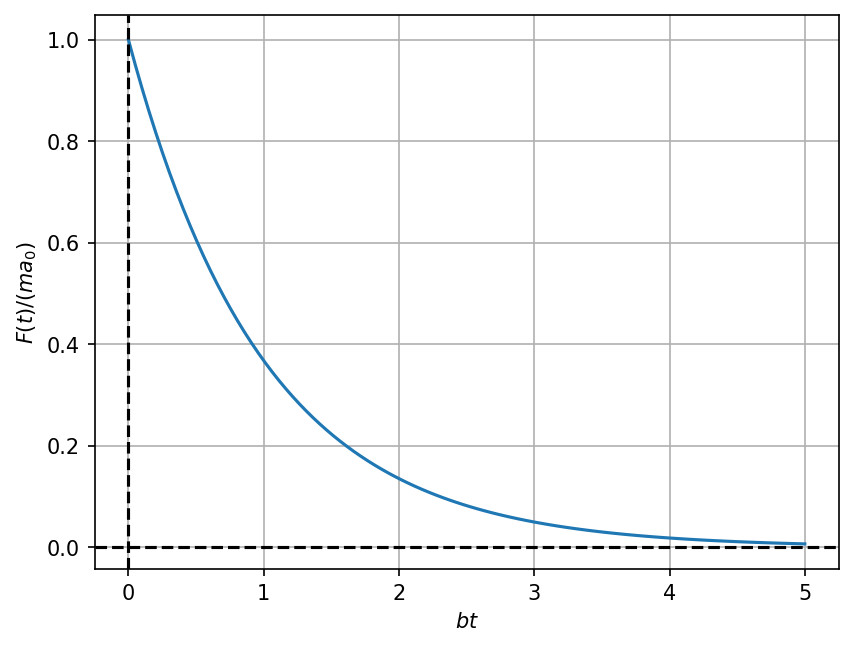

In [4]:
plot_FMorin39()

So, what is the expected behaviour? The force tails off, so we expect strong acceleration at first and as $t\to\infty$, the LHS of $F = m\dot v$ tends to zero too and we expect constant $v$.

Now for solving: you can plug into equations \eqref{eq:sol4v} and \eqref{eq:sol4x}, but if you never want to memorize them then why not start with $F=m\dot v$ and just derive from there?

$$m\ode{v}{t}=ma_0 \eexp{-bt} \Rightarrow \di v = a_0 \eexp{-bt}\di t$$
$$\Rightarrow \int_{v_0}^{v(t)}\di v'=\int_{t_0}^t a_0 \eexp{-bt'}\di t'$$
$$\Rightarrow v(t)=v_0-\left[\frac{a_0}{b}\eexp{-bt'}\right]_{t_0}^{t}=v_0+\frac{a_0}{b}\left(\eexp{-bt_0}-\eexp{-bt}\right).$$
Notice that as $t\rightarrow \infty$, $v \rightarrow v_0+ (a_0/b)\eexp{-bt_0}$, which is constant as we expected.  

If you plug in the initial condition $t_0=0$, $v_0=0$, you get
$$v(t)=\frac{a_0}{b}\left(1-\eexp{-bt}\right),$$
which has all of the expected properties we listed earlier.

Now for the $x(t)$ equation.  We can start from
$$\ode{x}{t} = v(t) \Rightarrow \di x = \frac{a_0}{b}\left(1-\eexp{-bt}\right)\di t \Rightarrow \int_{x_0}^{x(t)} \di x' = \frac{a_0}{b}\int_{t_0}^t\left(1-\eexp{-bt'}\right)\di t'$$
$$\Rightarrow x(t) - x(t_0)=\frac{a_0}{b}\left[ t'+ \frac{1}{b} \eexp{-bt'}\right]_{t_0}^t = \frac{a_0}{b}\left[t-t_0+\frac{1}{b} \left(\eexp{-bt}-\eexp{-bt_0}\right)\right].$$
Plug in the intial condition $t_0=0$, $x(t_0)=0$ to obtain
$$x(t)=\frac{a_0}{b}\left[t+\frac{1}{b}\left(e^{-bt}-1\right)\right].$$

And once plotted, our solution looks like the following.

In [5]:
def plot_Morin39():
    """ I use a function to let the plot appear in a separate cell
    (useful during slideshow) """
    v = a0*(1 - np.exp(-b*t))/b
    x = a0*(t + (np.exp(-b*t) - 1)/b)/b

    ax1 = plt.subplot(311)  # 3 lines, 1 column, 1st box
    ax1.plot(b*t, Fnorm/a0)
    ax1.set_ylabel("$F/(ma_0)$")
    ax1.axvline(1, color='g', linestyle='--')  # the 1/b time constant
    ax1.grid()

    ax2 = plt.subplot(312, sharex=ax1)  # 3 lines, 1 column, 2nd box
    ax2.plot(b*t, v/(a0/b))
    ax2.set_ylabel("$v/(a_0/b)$")
    ax2.axvline(1, color='g', linestyle='--')  # the 1/b time constant
    ax2.grid()

    ax3 = plt.subplot(313, sharex=ax1)  # 3 lines, 1 column, 2nd box
    ax3.plot(b*t, x/(a0/b**2))
    ax3.set_xlabel("$bt$")
    ax3.set_ylabel("$x/(a_0/b^2)$")
    ax3.axvline(1, color='g', linestyle='--')  # the 1/b time constant
    ax3.grid()

    plt.tight_layout()
    return

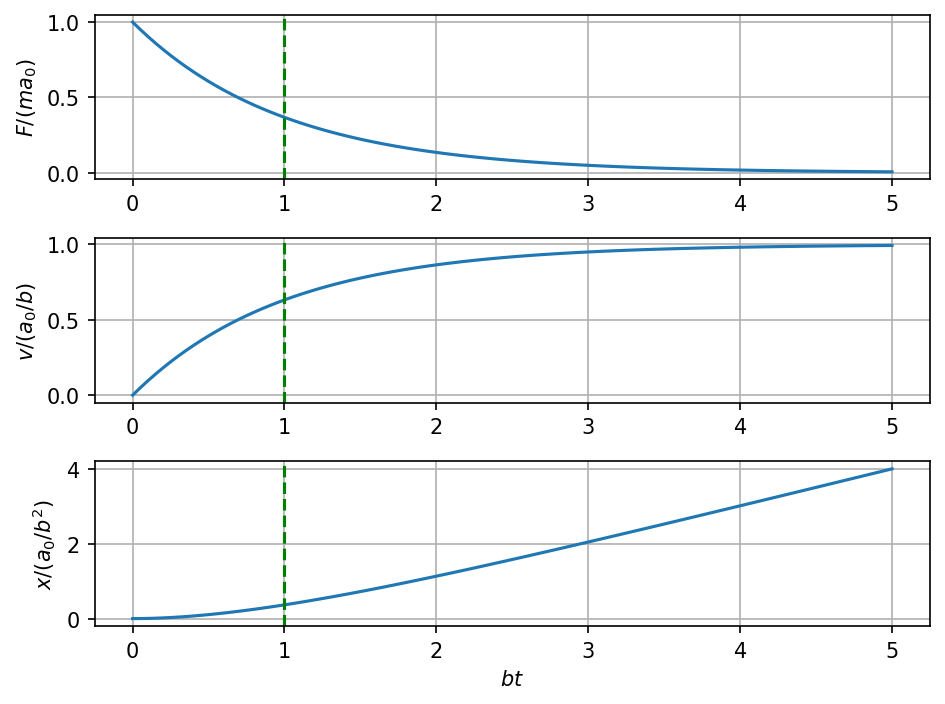

In [6]:
plot_Morin39()

### Velocity dependent force $F=F(v)$

#### General case 

We have
$$m\ode{v}t = F(v).$$
Using separation of variables we get:
$$m\frac{\di v}{F(v)}=\di t \thrfor m\int_{v_0}^{v} \frac{\di v'}{F(v')} = \int_{t_0}^{t}\di t'
    \thrfor t-t_0=m\int_{v_0}^{v}\frac{dv}{F(v)}.$$

We can't go any further until we know what $F(v)$ is.
In principle, this expression gives you $t=t(v)$, which can be inverted to obtain $v=v(t)$.
Then you can solve for $x(t)$.

#### Example 
*(time permitting; work out at home if not)*

**Q:** A particle experiences drag, given by $F(v)=-kv$. If it starts at velocity $v_0$, find its subsequent speed.

**A:**
$$m\ode{v}{t} = -kv \thrfor -\frac{m}{k}\int_{v_0}^v \frac{\di v'}{v'} = \int_{t_0}^t \di t'$$
$$\thrfor t-t_0 = -\frac mk\left[\ln(v')\right]_{v_0}^v \thrfor t-t_0=-\frac mk\ln\left(\frac{v}{v_0}\right),$$
(recall that $\forall a, b >0$, $\ln a - \ln b = \ln(a/b)$ to simplify the expression).  Taking the exponential of both sides and using our initial condition $t_0=0$, $v=v_0$, we get
$$v=v_0\eexp{-kt/m}$$

### Position dependent force $F=F(x)$

In this case we have
$$m\ode{v}{t}=F(x) \quad \text{or in another common form} \quad   m\oden2xt = F(x)$$
Notice that unlike the other cases, we can't solve this one with separation of variables right away.
We will have to do something else.
Also, this isn't some strange outlier case, since conservative forces all fall in this category.
So, how do we solve it?
Answer: by converting it to a form that will allow us to use separation of variables.

Using the chain rule we can write
$$a=\ode{v}{t} = \ode{v}{x}\ode{x}{t} = \ode{v}{x}v.$$
We have essentially removed the variable time from the derivative.
By plugging this form of the acceleration into $F=ma$, we get
$$mv\ode{v}{x}=F(x).$$
and we can now use separation of variables!

$$mv\di v = F(x)\di x \thrfor m\int_{v_0}^v v'\di v' = \int_{x_0}^x F(x')\di x'$$
$$\thrfor\frac12 m\left[v'^2\right]_{v_0}^v = \int_{x_0}^x F(x')\di x' \thrfor \frac12 m \left(v^2 -  v_0^2\right)= \int_{x_0}^x F(x')\di x'.$$
You might recognize this as a standard Work/Kinetic energy equation.

### Epilogue

So, have we considered all possible cases?  No!  We have not considered the case where the force is a function of some combination of these variables.  What about $F=F(x,v)$ or $F=F(v,t)$? These are harder examples that generally can't be solved using separation of variables.  Other methods of solving ODEs can sometimes be used.  Sometimes, there is no known analytic solution!  Luckily, we can (pretty much) always numerically integrate the ODE so get a numerical solution.  We'll see how to do this in the next lecture.

# Motion in plane, polar coordinates

... but before that, we need to introduce another tool to describe some mechanical problems: polar coordinates.
We will restrict ourselves to motions in planes to keep it simple.


Sometimes, Cartesian coordinates $(x, y)$ are awkward.
For example, motion is sometimes restricted to circles (wheels, pendulums...) or there is a central symmetry to the problem (e.g., big old star attracting everything in its vicinity).
In such cases, it is more useful to define a centre, and then to define the distance $r$ (some prefer to use $\rho$) to that centre, and the angle $\theta$ (some prefer to use $\phi$) with respect to some reference angle. 

## Definitions

Let's introduce: 
* the coordinate transformation $(x,y)\rightarrow(r,\theta)$ (See Morin's fig. 3.7, reproduced below)
    \begin{equation}
    (x,y) = r(\cos\theta,\sin\theta)
    \end{equation}
* the transformation of unit vectors $(\unit \imath,\unit\jmath)\rightarrow(\unit r,\unit\theta)$ (See Morin's fig. 3.8, also reproduced below)
    \begin{equation}
    \unit r = \cos\theta\unit\imath  + \sin\theta\unit\jmath,\quad \unit\theta = -\sin\theta\unit\imath + \cos\theta\unit\jmath
    \end{equation}
    
The directions are called "radial" when it comes to $r$ and $\unit r$ and "azimuthal" when it comes to $\theta$ and $\unit \theta$.

<div>
<img src="Morin_3_7.png" width="200"/>
</div>

![Morin Fig. 3.8, p. 69](Morin_3_8.png)

How does one use $\Fma$ these new coordinates then? Indeed, velocity and acceleration look different in polar coordinates, let's see how to calculate them. 

* We keep using the dot notation, namely, $\dot f = \odel{f}t$, $\ddot f= \odeln{2}ft$.

* Unlike Cartesian unit vectors, the radial and azimuthal unit vectors have non-zero time derivatives, namely,
    \begin{align}
    \dot{\unit r} & = -\dot\theta \sin\theta\unit\imath + \dot\theta\cos\theta\unit\jmath = \dot\theta \unit \theta\\
    \text{and likewise,}\quad\dot{\unit\theta} & = -\dot\theta\unit r.
    \end{align}
* Now the position vector is $$\vec r = x\unit\imath+y\unit\jmath=r\unit r.$$
* The velocity is
    \begin{equation}
    \vec v = \dot{\vec r}=\dot r\unit r + r\dot {\unit r}=\dot r\unit r+r\dot\theta\unit\theta
    \end{equation}
    Thus, the radial component of the velocity is $\dot r$ and the azimuthal component of the velocity is $r\dot\theta$.
* Now the acceleration:
    \begin{align}
        \vec a = \ddot{\vec r} & = \ddot r\unit r + \dot r\dot{\unit r} + \dot r\dot\theta\unit\theta + r\ddot\theta\unit\theta + r\dot\theta\dot{\unit\theta}\nonumber \\
               & = \bigl(\ddot r-r\dot\theta^2\bigr)\unit r + \bigl(2\dot r\dot\theta+r\ddot\theta\bigr)\unit\theta
    \end{align}
* Now, Newton's second law is $\Fma$.
    Expressing $\vec F = F_r\unit r + F_\theta\unit \theta$, we find
    \begin{align}
    F_r & = m\bigl(\ddot r -r\dot \theta^2\bigr), \label{eq:Fr}\\ 
    F_\theta & = m \bigl(2\dot r \dot \theta + r\ddot\theta\bigr).  \label{eq:Ft}
    \end{align}

## Examples

### First example

> Find the radius of orbit $r$ of a planet in uniform circular motion around the sun under the influence of gravity with $F_r = -GMm/r^2$, if the period is one year.

**Answer:** In this case, $\dot r= 0$, $\dot\theta=\omega=2\pi/(365.25\times24\times3600)$, $\ddot r = 0$, $F_\theta=0$. So,
\begin{equation}
-\frac{GMm}{r^2}=-mr\omega^2\Rightarrow r=\left(\frac{GM}{\omega^2}\right)^{1/3}.
\end{equation}

In [7]:
from astropy.constants import G, M_sun
# Do the math in Python...

Barring typing errors, the answer should be $\approx 1.5\times 10^8$ km.

### Morin p. 75, Problem 3.23
    
*Note: we might not have time to do it in class, in which case I urge you to to it at home, and I will answer question at the beginning of the next lecture.*

> Consider a particle that feels an angular force only, of the form $F_{\theta} = m\dot{r}\dot{\theta}$.
Show that $\dot{r}=\sqrt{A\ln r + B}$, where $A$ and $B$ are constants of integration, determined by initial conditions.

**Answer:**  Applying force equations (\ref{eq:Fr}-\ref{eq:Ft}), we get
\begin{align}
0 & = m(\ddot{r}-r\dot{\theta}^2) \andeq \label{eq:Fr:ex}\\
m\dot{r}\dot{\theta} & = m(r\ddot{\theta}+2\dot{r}\dot{\theta}). \label{eq:Ft:ex}
\end{align}
If you start fidgeting with both equations you might stumble upon the answer eventually, but is there a more systematic way?  Probably.  Here's one possibility. Choose one of the equations, identify the type of ODE as we did earlier in this lecture and integrate it.  In this example, things may seem stranger because of all the dots over variables, but $\dot{r}$ is still a velocity and can be treated as such.  Let's start with the second equation, eq. \eqref{eq:Ft:ex}.  Simplifying it a bit gives
$$-\dot{r}\dot{\theta} = r\ddot{\theta}.$$
Separating the variables gives
$$-\frac{\dot{r}}{r} = \frac{\ddot{\theta}}{\dot{\theta}}.$$

Both sides are a derivative over a variable.  Substituting $\omega = \dot{\theta}$, we can write
$$-\frac{\dot{r}}{r} = \frac{\dot{\omega}}{\omega} \oreq \frac{1}{r}\ode{r}{t} = -\frac{1}{\omega} \ode{\omega}{t}.$$

We can integrate in time. Note that the way the question is written implicitly assumes that we know the initial conditions. He couldn't be bothered to introduce notations, nor should he have been, because it's just an example and we are grown ups who can come up with our own. So, let's introduce the initial radius $r_0$ and angular velocity $\omega_0$. An alternative would be to not be bothered ourselves and use indefinite integrals, i.e., the kinds of integrals where we don't write the bounds. Either option is fine.
    
So, multiplying both sides by $\di t$ and integrating both sides from the initial conditions gives
$$\int_{r_0}^r \frac{\di r'}{r'} = -\int_{\omega_0}^\omega\frac{\di\omega'}{\omega'}   \thrfor \ln
\left(\frac{r}{r_0}\right) = - \ln\left(\frac{\omega}{\omega_0}\right) = \ln\left(\frac{\omega_0}{\omega}\right).$$

We can take the exponential of both sides and get
$$r = \frac{r_0\omega_0}{\omega} = \frac{r_0\omega_0}{\dot\theta} \thrfor \dot{\theta}=\frac{r_0\omega_0}{r}.$$
    
Now we can use equation \eqref{eq:Fr:ex}, which was starting to feel left out:
\begin{equation}
\ddot{r} = r\dot{\theta}^2 = r \left(\frac{r_0\omega_0}{r}\right)^2 = \frac{r_0^2\omega_0^2}{r}.\label{eq:left_out}
\end{equation}

To solve this equation we notice that it is similar in form to the ODEs where the force was dependent on position (remember $m\ddot{x} = F(x)$).   Notice how like earlier, the second derivative of position $\ddot{r}$ is a function of position $r$.  In order to solve this equation we therefore have to apply the same trick of eliminating time from the problem.  Remember that $\dot{r} = v_r$. Using the chain rule we get
$$\ddot{r} = \ode{v_r}{t} = \ode{v_r}{r}\ode{r}{t} = v_r\ode{v_r}{r}.$$

Substituting this into Eq. \eqref{eq:left_out}, introducing $v_r(t=0) = v_{r0}$, and separating variables gives
\begin{equation}
v_r\di v_r = r_0^2\omega_0^2\frac{\di r}{r} \thrfor \int_{v_{r0}}^{v_r}  v_r'\di v_r' = r_0^2\omega_0^2\int_{r_0}^r \frac{\di r'}{r'}  \thrfor \frac{1}{2}\left(v_r^2 - v_{r0}^2\right) = r_0^2\omega_0^2 \ln \left(\frac{r}{r_0}\right)
\end{equation}

Now, remembering that $v_r=\dot{r}$, we can substitute back in and solve for $\dot{r}$ to get
$$\boxed{\dot{r} = \sqrt{A\ln r + B}},$$
with $A = 2r_0^2\omega_0^2$ and $B = v_{r0}^2 - A\ln r_0$, as requested.

*Note:  The key to this problem was not to be confused by all the dots.  Always remember to try to relate back to one of the ODE forms from the last section of this lecture.  That will tell you how to get to the point where you can separate the variables and integrate.*
    
*Note #2: Maybe I am being too ana... particular, but dimensional arguments of mathematical functions are bad etiquette. Looking at you, $\ln r$, which should be $ln(r/r_0)$. Same goes for $\exp$, $\sin$, $\cos$... Always using non-dimensional arguments also makes it a lot easier to check the units of your expressions, which then prevents avoidable mistakes during exams.*

In [8]:
r0, omega0, vr0 = 1., 10., 0.5  # why not
A = 2*(r0*omega0)**2
B = vr0**2 - A*np.log(r0)
r = np.linspace(r0, 10*r0, 128)  # 128 values between r0 and 10*r0
dotr = (A*np.log(r) + B)**.5

Text(0, 0.5, '$\\dot r/v_{r0}$')

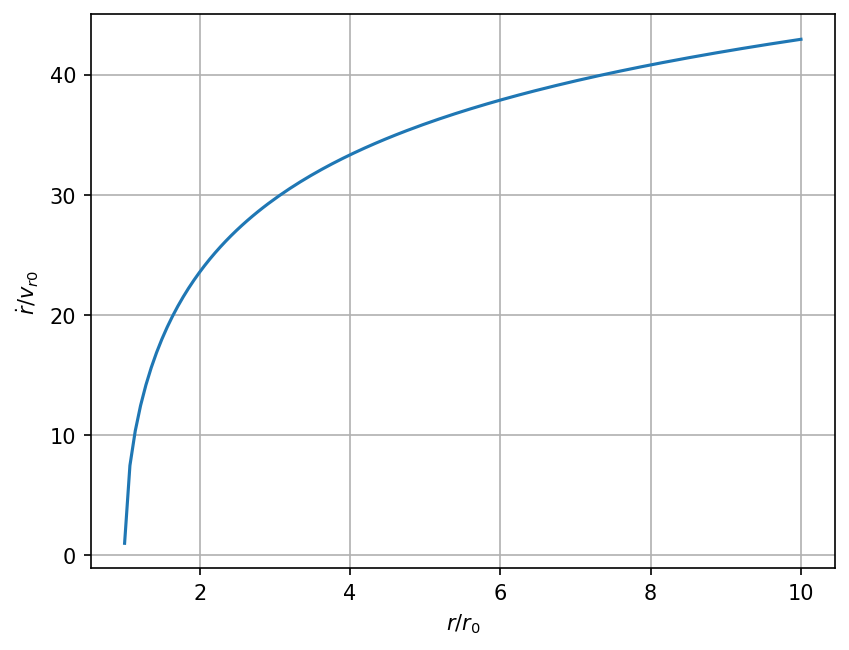

In [11]:
plt.plot(r/r0, dotr/vr0)
plt.grid()
plt.xlabel('$r/r_0$')  # alway put units on your axes. Here, r0 is the unit
plt.ylabel('$\dot r/v_{r0}$')  # idem

### Suggested example: Morin p. 70

We definitely won't have time to see it in class, but it is a good one and I recommend you study it.